# 타이타닉 데이터 정리/탐색 연습 문제
## 데이터의 빈 부분을 처리하라.
1. 각 컬럼에 빈 값이 얼마나 있는지 확인하라.
2. 각 컬럼에 빈 값을 적절히  채우고 빈 값이 200이 넘어가는 데이터는 특징에서 제외한다.

## 다음 내용을 그래프로 그려 데이터를 확인하라.
1. 생존자와 사망자 수와 생존율은 얼마인가?
2. 성별에 따른 생존자와 사망자 수와 생존율은 얼마인가?
3. 클래스에 따른 생존자와 사망자 수와 생존율은 얼마인가?
4. 생애단계별 생존자수와 생존율은 얼마인가(Kid(10세이하), Teenager(20세이하), Adult(50세이하), Senior(50세 초과)?
5. 각 특징에 얼마나 많은 고유 데이터가 있는지 나타내라.
6. 다양한 시각화를 사용해 생존율과 각 속성 간의 어떤 관계가 있는지 나타내라.

In [1]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터의 빈 부분을 처리하라.
1. 각 컬럼에 빈 값이 얼마나 있는지 확인하라.

In [3]:
titanic_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

2. 각 컬럼에 빈 값을 적절히  채우고 빈 값이 200이 넘어가는 데이터는 특징에서 제외한다.

In [4]:
# cabin 드랍
titanic_df.drop(['Cabin'], axis=1, inplace=True) # inplace=True 현재 있는 데이터를 변경

# age 중간값
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Embarked 최빈값 (선착장)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

titanic_df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 다음 내용을 그래프로 그려 데이터를 확인하라.
1. 생존자와 사망자 수와 생존율은 얼마인가?

In [5]:
print("생존자 수 현황")
result = titanic_df['Survived'].value_counts()
print('생존자:', result[0])
print("사망자:", result[1])

생존자 수 현황
생존자: 549
사망자: 342


<AxesSubplot:xlabel='Survived', ylabel='count'>

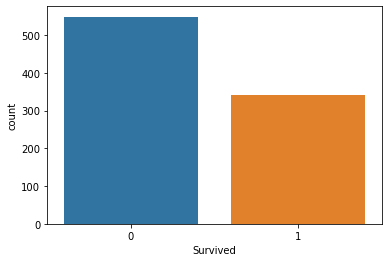

In [6]:
sns.countplot(data=titanic_df, x='Survived')

In [7]:
result = titanic_df['Survived'].value_counts()/titanic_df['Survived'].count()
print('사망자 비율:', result[0])
print("생존자 비율:", result[1])

사망자 비율: 0.6161616161616161
생존자 비율: 0.3838383838383838


2. 성별에 따른 생존자와 사망자 수와 생존율은 얼마인가?

In [8]:
surived_count_by_sex_series = titanic_df.pivot_table(index=["Sex"], values=["Survived"], aggfunc=np.sum)
surived_mean_by_sex_series = titanic_df.pivot_table(index=["Sex"], values=["Survived"], aggfunc=np.mean)

surived_count_by_sex_series

,Survived
Sex,
female,233
male,109


In [9]:
surived_mean_by_sex_series

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex'>

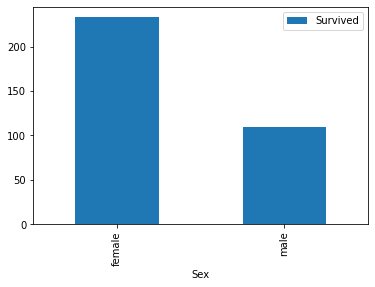

In [10]:
surived_count_by_sex_series.plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

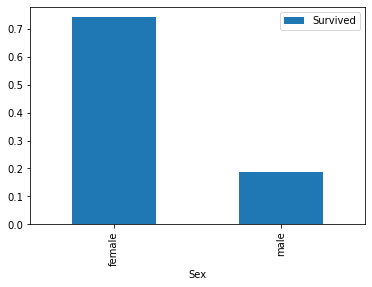

In [11]:
surived_mean_by_sex_series.plot(kind='bar')

3. 클래스에 따른 생존자와 사망자 수와 생존율은 얼마인가?


In [12]:
surived_count_by_Pclass_series = titanic_df.pivot_table(index=["Pclass"], values=["Survived"], aggfunc=np.sum)
surived_mean_by_Pclass_series = titanic_df.pivot_table(index=["Pclass"], values=["Survived"], aggfunc=np.mean)
 
result_df = pd.DataFrame(np.hstack([surived_count_by_Pclass_series.values, surived_mean_by_Pclass_series.values]), columns=['number of survivors', 'survival rate'])
result_df

,number of survivors,survival rate
0,136.0,0.629630
1,87.0,0.472826
2,119.0,0.242363


<AxesSubplot:>

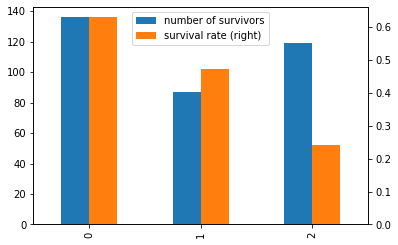

In [13]:
result_df.plot(kind='bar', secondary_y='survival rate')

4. 생애단계별 생존자수와 생존율은 얼마인가(Kid(10세이하), Teenager(20세이하), Adult(50세이하), Senior(50세 초과)?


In [14]:
titanic_df['life_stage'] = "Senior"
titanic_df["life_stage"][titanic_df['Age'] <= 50] = "Adult"
titanic_df["life_stage"][titanic_df['Age'] <= 20] = "Teenager"
titanic_df["life_stage"][titanic_df['Age'] <= 10] = "Kid"

C:\Users\isc03\AppData\Local\Temp\ipykernel_20096\1915958739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["life_stage"][titanic_df['Age'] <= 50] = "Adult"
C:\Users\isc03\AppData\Local\Temp\ipykernel_20096\1915958739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["life_stage"][titanic_df['Age'] <= 20] = "Teenager"
C:\Users\isc03\AppData\Local\Temp\ipykernel_20096\1915958739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [15]:
titanic_df[titanic_df['Age']<= 20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,life_stage
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Kid
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Teenager
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,Kid
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Teenager
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S,Kid
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,Teenager
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,S,Teenager
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,S,Teenager


In [16]:
#titanic_df['life_stage'].value_counts().plot(kind='bar')

surived_count_by_life_stage_series = titanic_df.pivot_table(index=["life_stage"], values=["Survived"], aggfunc=np.sum)
surived_mean_by_life_stage_series = titanic_df.pivot_table(index=["life_stage"], values=["Survived"], aggfunc=np.mean)

result_df = pd.DataFrame(np.hstack([surived_count_by_life_stage_series.values, surived_mean_by_life_stage_series.values]), 
                         columns=['number of survivors', 'survival rate'],
                        index=surived_count_by_life_stage_series.index)
result_df

,number of survivors,survival rate
life_stage,,
Adult,238.0,0.367284
Kid,38.0,0.593750
Senior,22.0,0.343750
Teenager,44.0,0.382609


<AxesSubplot:xlabel='life_stage'>

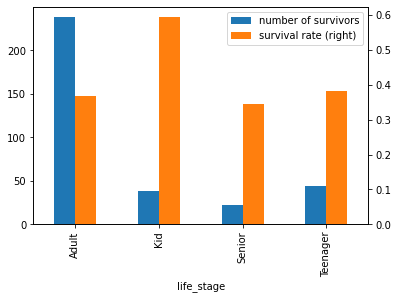

In [17]:
result_df.plot(kind='bar', secondary_y='survival rate')

5. 각 특징에 얼마나 많은 고유 데이터가 있는지 나타내라.


In [18]:
titanic_df.drop(['Name','Age','Ticket','Fare'], axis=1).nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
SibSp            7
Parch            7
Embarked         3
life_stage       4
dtype: int64

6. 다양한 시각화를 사용해 생존율과 각 속성 간의 어떤 관계가 있는지 나타내라.

In [19]:
from sklearn.preprocessing import LabelEncoder

new_one = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

sex_le = LabelEncoder() # 데이터 전처리
embarked_le = LabelEncoder()
life_stage_le = LabelEncoder()

new_one['Sex'] = sex_le.fit_transform(new_one['Sex'])
new_one['Embarked'] = embarked_le.fit_transform(new_one['Embarked'])
new_one['life_stage'] = life_stage_le.fit_transform(new_one['life_stage'])

new_one

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,life_stage
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,0
887,1,1,0,19.0,0,0,30.0000,2,3
888,0,3,0,28.0,1,2,23.4500,2,0
889,1,1,1,26.0,0,0,30.0000,0,0


<AxesSubplot:title={'center':'Titanic feature correlation'}>

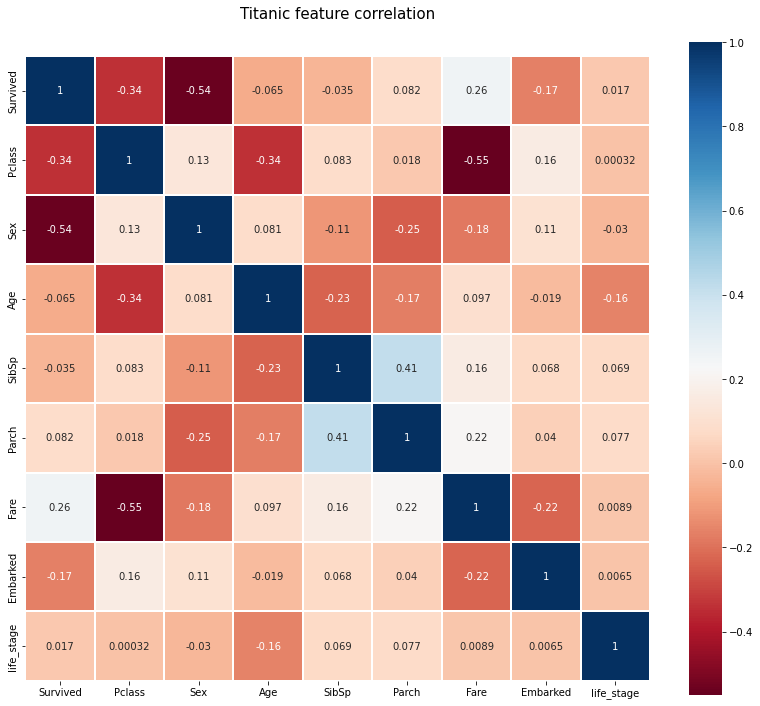

In [20]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Titanic feature correlation', y=1.05, size=15)
sns.heatmap(new_one.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)